In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# def detect_lines(
#     img, threshold1=50, threshold2=150, apertureSize=3, minLineLength=100, maxLineGap=10
# ):
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # convert to grayscale
#     edges = cv2.Canny(gray, threshold1, threshold2, apertureSize)  # detect edges
#     return cv2.HoughLinesP(
#         edges,
#         1,
#         np.pi / 180,
#         125,
#         minLineLength,
#         maxLineGap,
#     )  # detect lines

In [3]:
img = cv2.imread('pool.png')

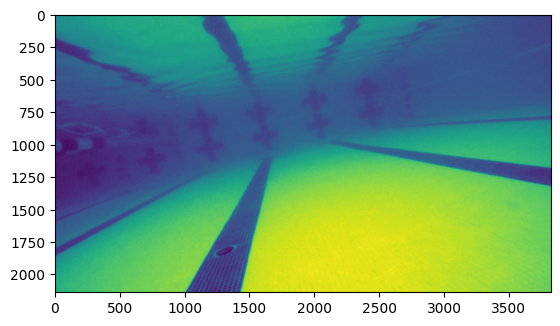

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # convert to grayscale
plt.imshow(gray)

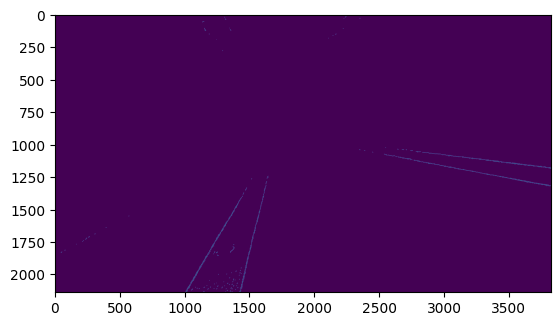

In [5]:
edges = cv2.Canny(gray, 30, 40, 3)  # detect edges
plt.imshow(edges)

In [6]:
def draw_lines(img, lines, color=(0, 255, 0)):
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(img, (x1, y1), (x2, y2), color, 2)

In [7]:
# lines = detect_lines(img, 10, 20, 5)
lines = cv2.HoughLinesP(
        edges,
        rho = 1,
        theta = np.pi / 180,
        threshold = 100,
        minLineLength = 150,
        maxLineGap = 20
    )
print(lines)

[[[2825 1135 3210 1210]]

 [[2976 1080 3319 1122]]

 [[3422 1250 3694 1303]]

 [[3085 1093 3764 1176]]

 [[3492 1145 3693 1169]]

 [[1110 1952 1292 1649]]

 [[1172 1852 1405 1465]]

 [[3358 1237 3617 1287]]

 [[1551 1609 1603 1403]]

 [[1045 2066 1225 1767]]

 [[1470 1944 1523 1715]]

 [[1221 1769 1325 1596]]

 [[3471 1139 3625 1158]]

 [[1514 1746 1571 1517]]

 [[2544 1081 2799 1131]]

 [[3140 1195 3403 1246]]

 [[1320 1604 1426 1421]]

 [[1006 2136 1170 1862]]

 [[1346 1562 1434 1410]]

 [[1429 2106 1470 1940]]

 [[2790 1130 3045 1179]]

 [[1478 1916 1524 1714]]

 [[1068 2024 1210 1787]]]


In [8]:
# draw_lines(img, lines)
def get_lines(img, lines):
    equations = {}
    for line in lines:
        x1, y1, x2, y2 = line[0]
        slope = (y2-y1) / (x2 - x1)
        y_intercept = y2 - x2*slope
        
        pair = (slope, y_intercept)
        to_be_popped = []
        avg_slope = pair[0]
        avg_intercept = pair[1]
        identical_counter = 1
        for pairing in equations:
            if abs(min(pairing[0], pair[0])/max(pairing[0], pair[0])) > 0.95 and abs(min(pairing[1], pair[1])/max(pairing[1], pair[1])) > 0.95:
                avg_slope+=(pairing[0])
                avg_intercept+=(pairing[1])
                identical_counter+=1
                to_be_popped.append(pairing)
        
        for removal in to_be_popped:
            equations.pop(removal)
        equations[(avg_slope / identical_counter, avg_intercept / identical_counter)] = ((x1,y1), False)

        cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        to_be_popped.clear()
    return equations


In [9]:

def draw_lines(img, equations):
    for line in equations:
        slope = line[0]
        x1 = equations[line][0][0]
        y1 = equations[line][0][1]
        cv2.putText(img, str(slope), (x1,y1), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    plt.imshow(img)
    plt.show()


In [10]:

eqs = get_lines(img, lines)


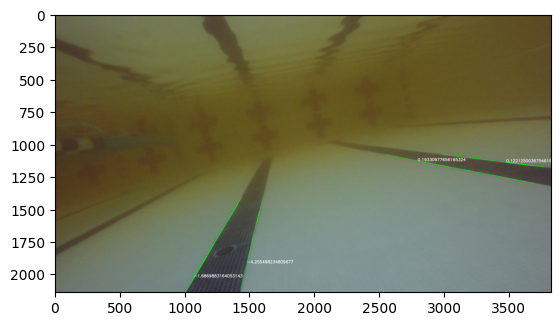

In [11]:
draw_lines(img, get_lines(img, lines))


In [36]:
# print(eqs)
res = {key: eqs[key] for key in sorted(eqs.keys(), key = lambda ele: ele[1])}
# print(res)
# print("\n\n\n\n")

cnt = 0
pairs = []
for key in res:
    pairs.append((key,res[key]))

print(pairs)


[]
[((0.19330977656165324, 589.531508925993), ((2790, 1130), False)), ((0.12212500367546197, 716.326788965107), ((3471, 1139), False)), ((-1.6869883164053143, 3832.2753483515294), ((1068, 2024), False)), ((-4.255498234809677, 8199.535667995628), ((1478, 1916), False))]
